In [1]:


%matplotlib inline
import numpy
import matplotlib.pyplot as plt

from matplotlib import pyplot

In [2]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [3]:
def u_initial(nx):
    u = numpy.zeros(nx)
    u[0:2/4*nx]=1
    
    return u

In [4]:
nx = 81
nt = 70
dx = 4.0/(nx-1)

In [5]:
computeF = lambda u: (u/2)**2

In [6]:
def maccormack(u, nt, dt, dx):
    un = numpy.zeros((nt,len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    
    for i in range(1,nt):
        F = computeF(u)
        
        ustar[:-1] = u[:-1]-dt/dx*(F[1:]-F[:-1])
        
        Fstar = computeF(ustar)
        
        un[i,1:] = 0.5*(u[1:]+ustar[1:]-dt/dx*(Fstar[1:]-Fstar[:-1])) 
        
        u = un[i].copy()
        
    return un

In [7]:
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,


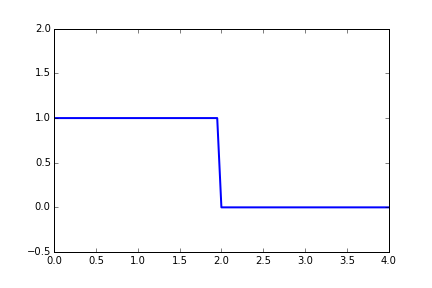
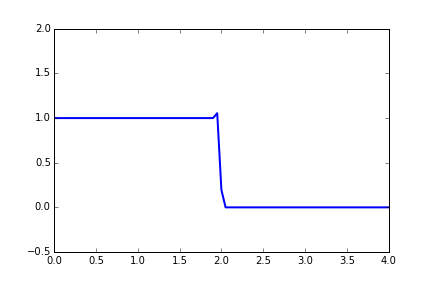
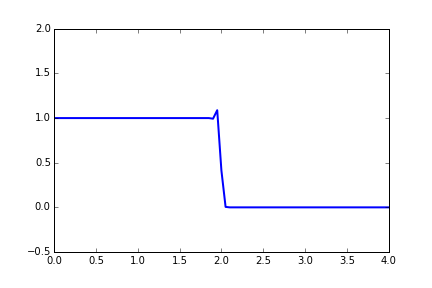
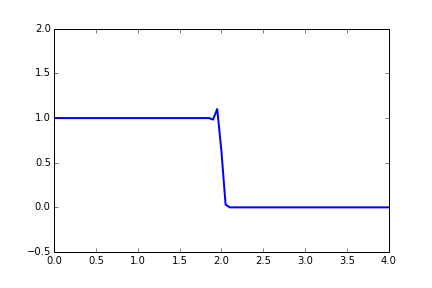
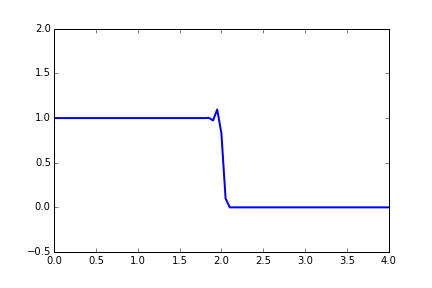
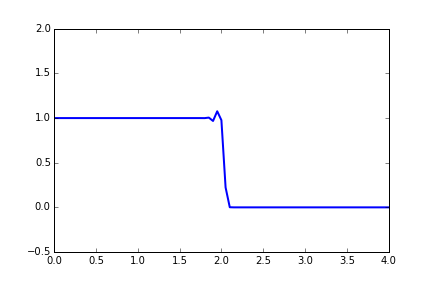
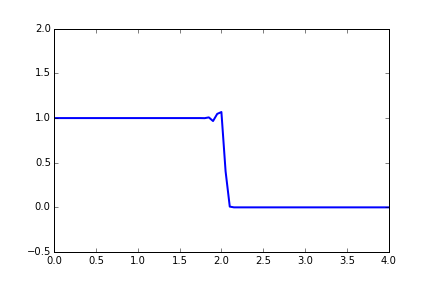
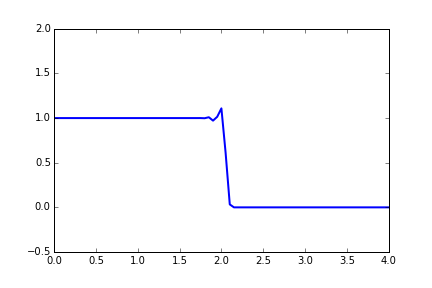
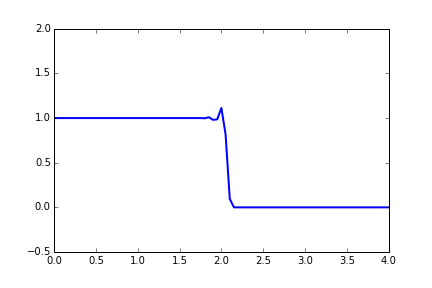
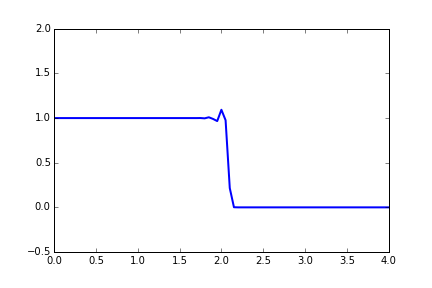
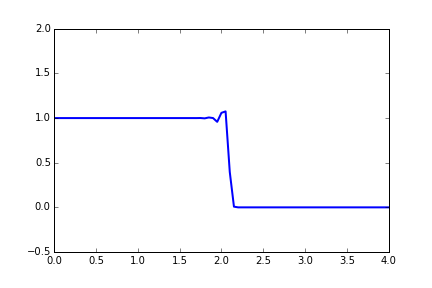
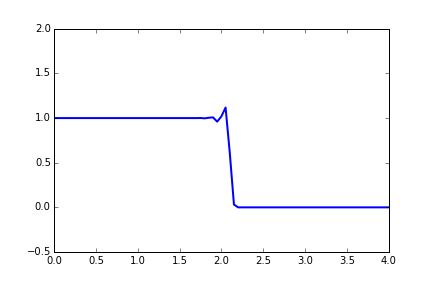
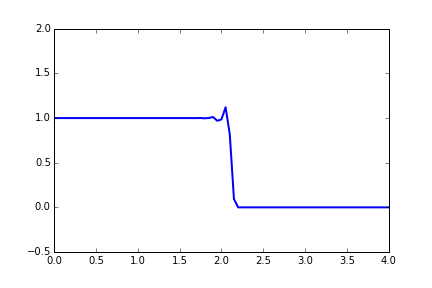
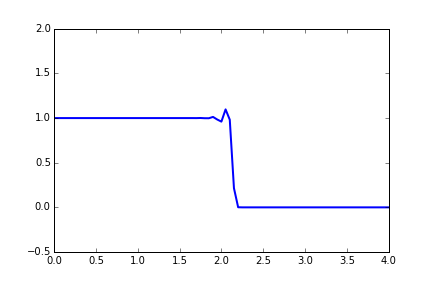
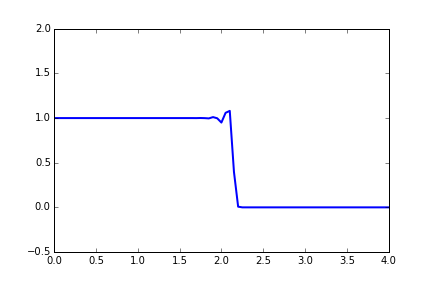
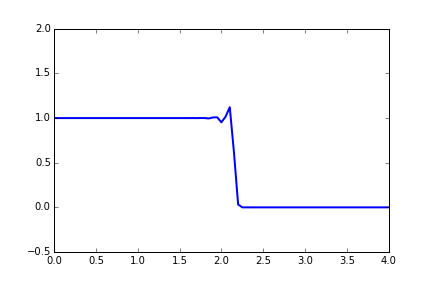
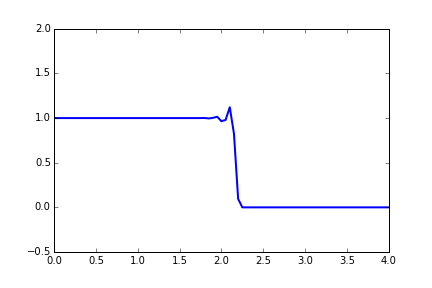
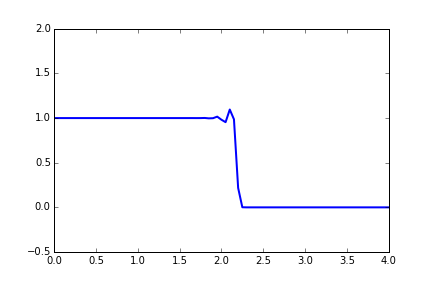
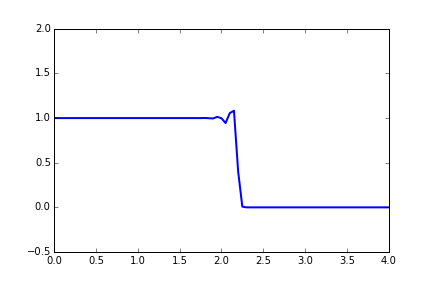
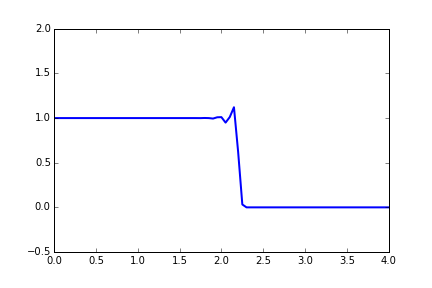
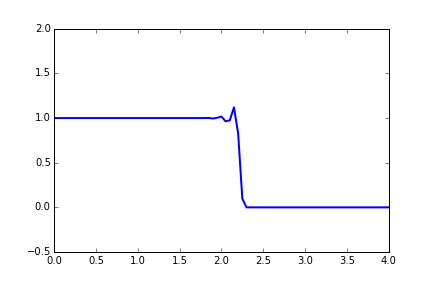
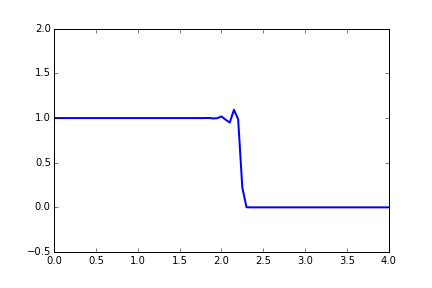
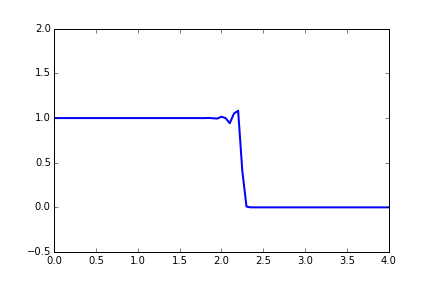
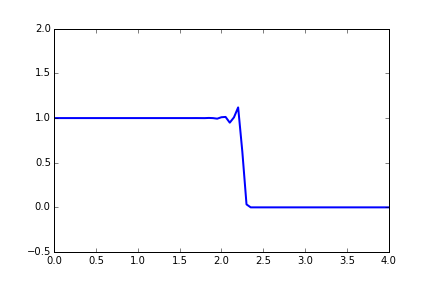
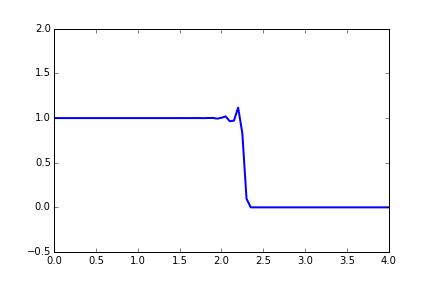
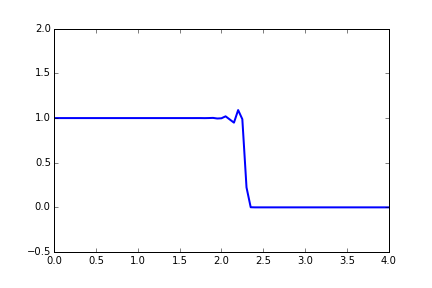
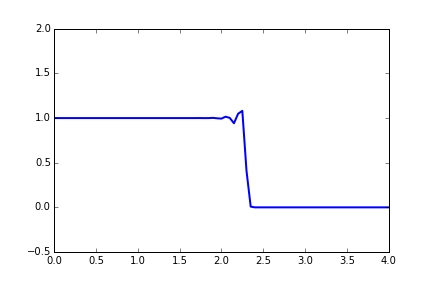
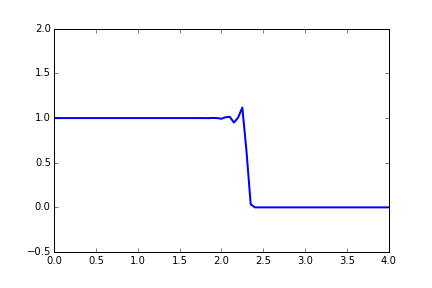
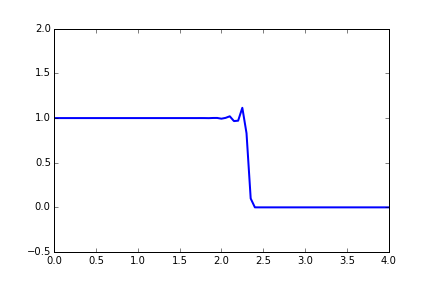
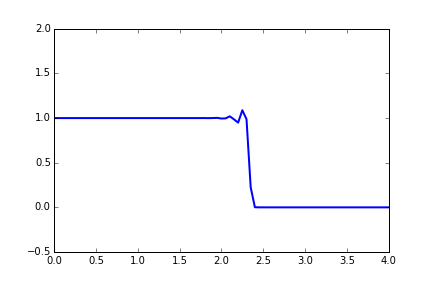
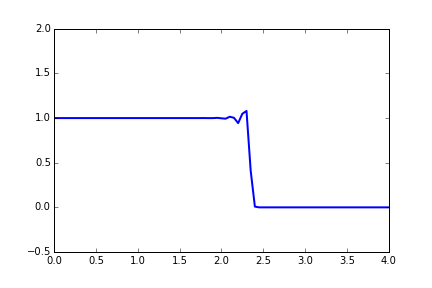
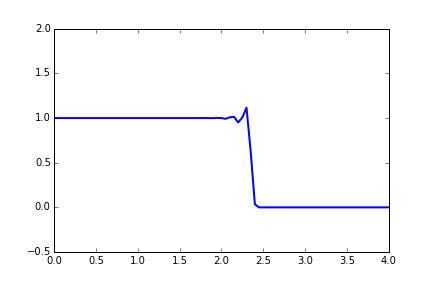
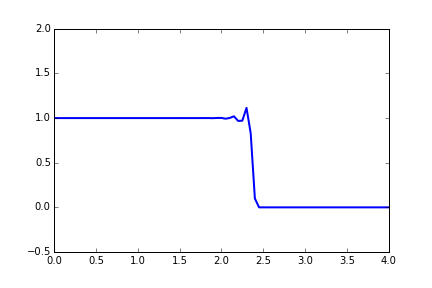
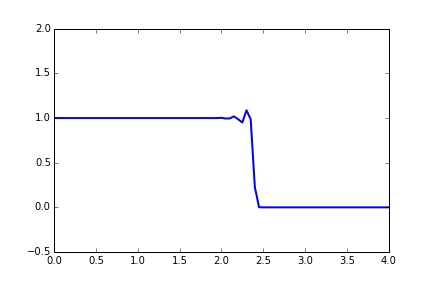
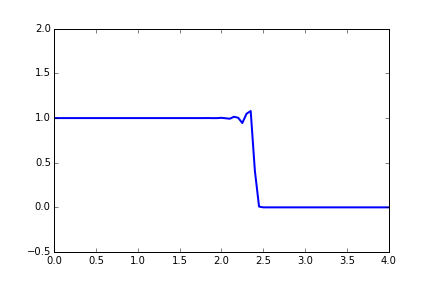
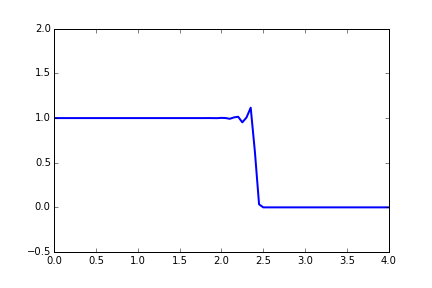
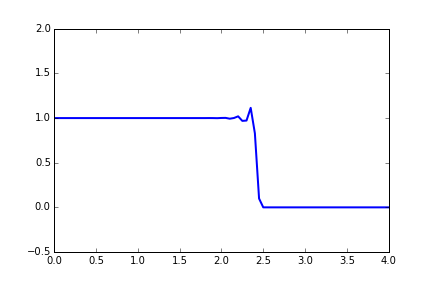
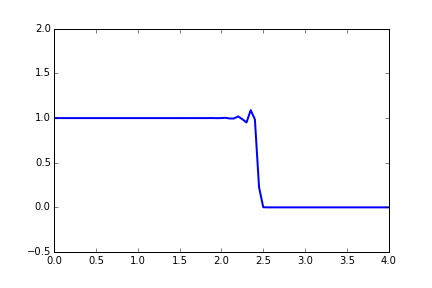
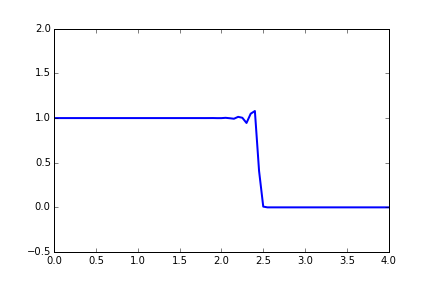
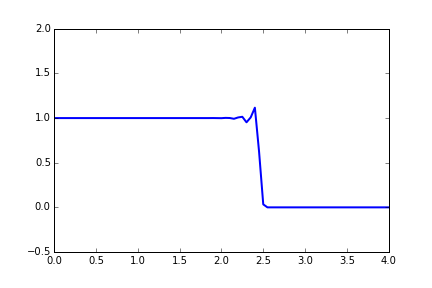
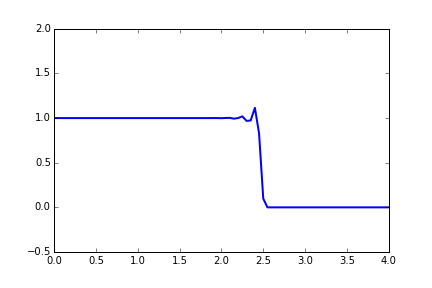
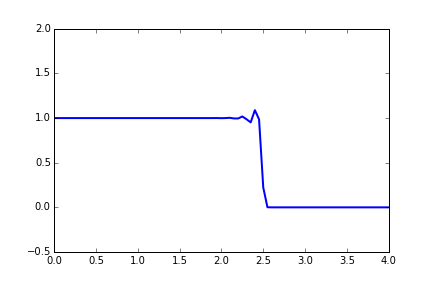
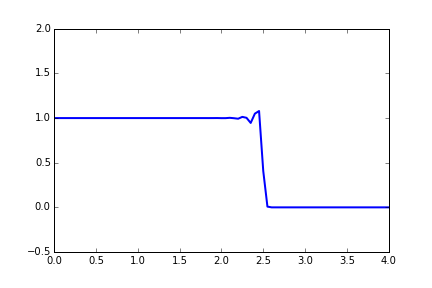
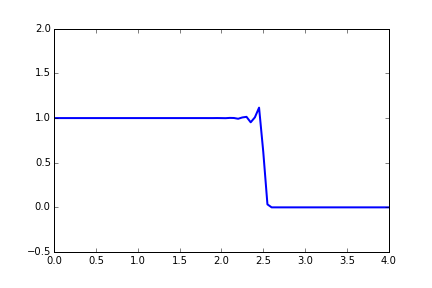
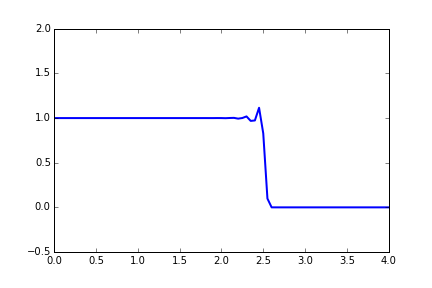
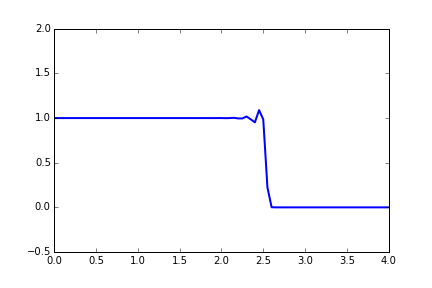
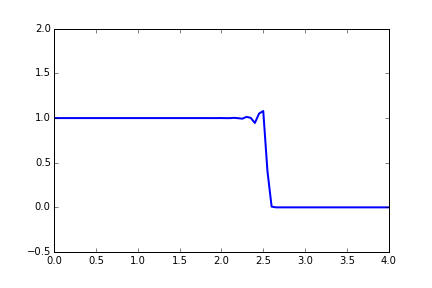
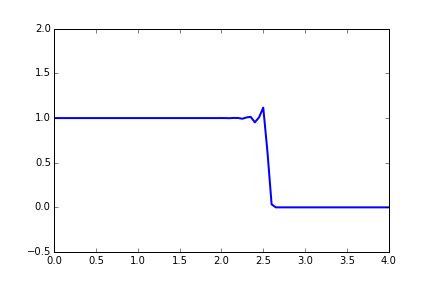
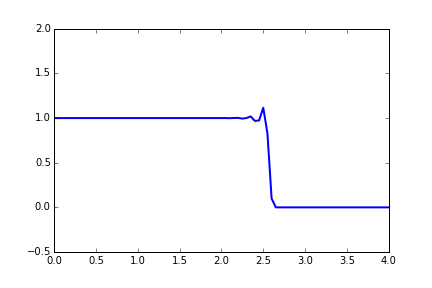
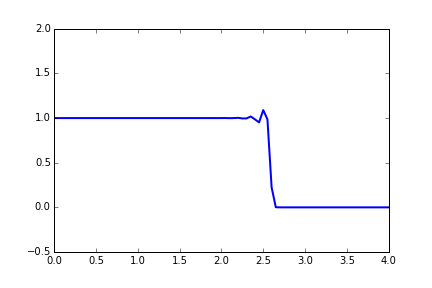
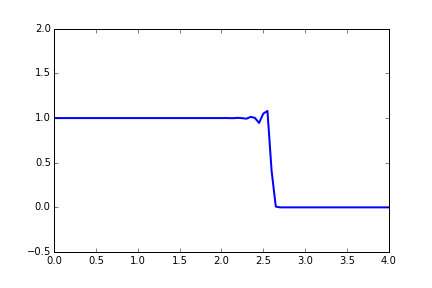
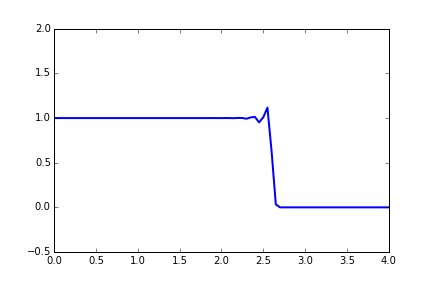
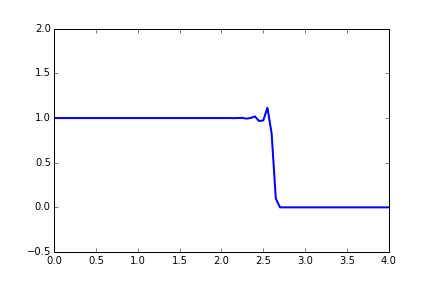
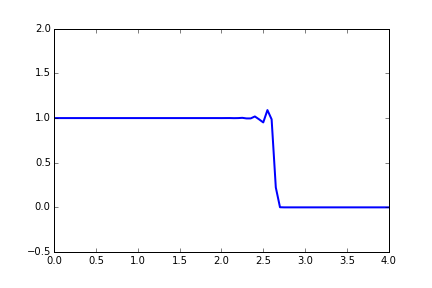
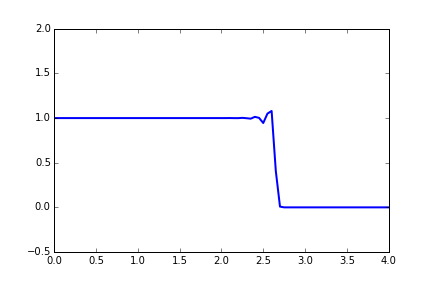
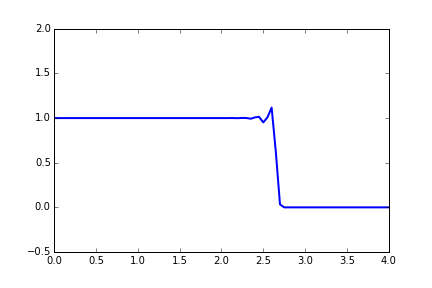
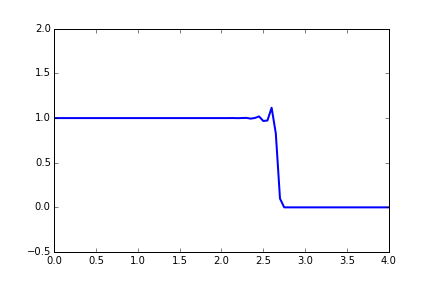
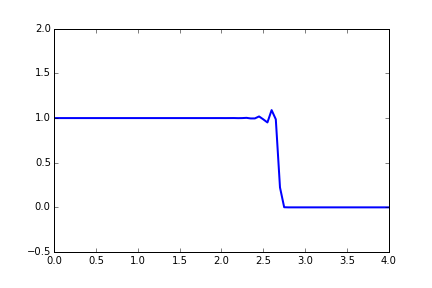
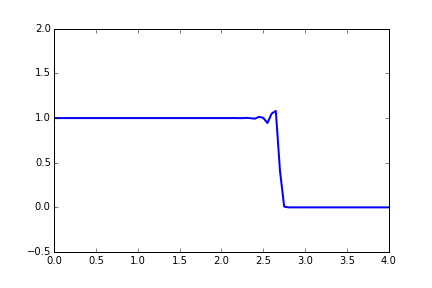
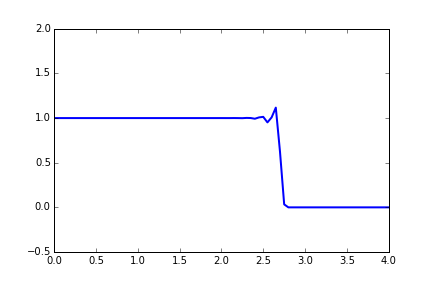
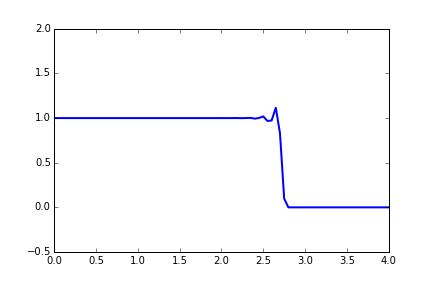
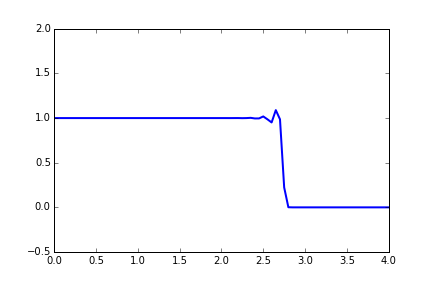
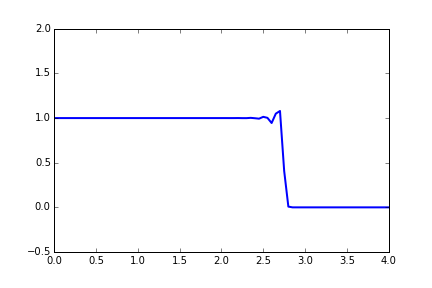
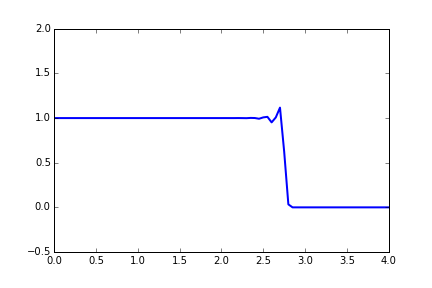
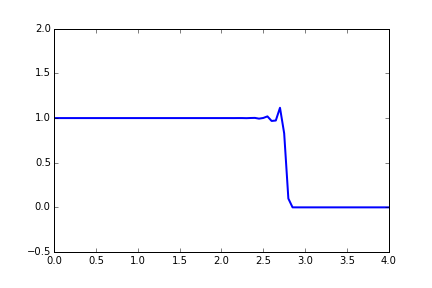
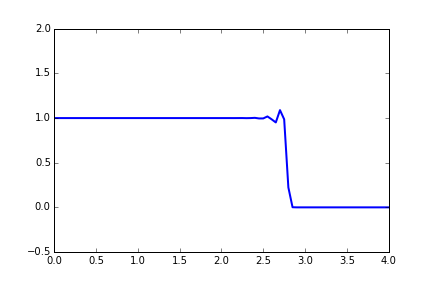
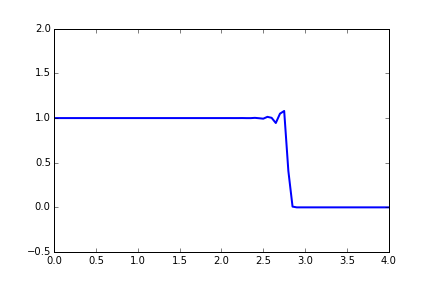
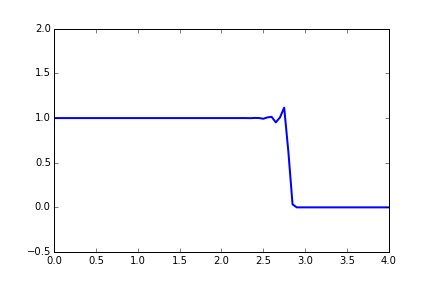
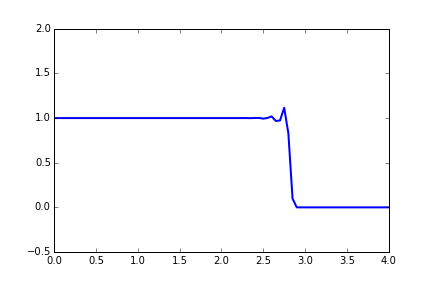
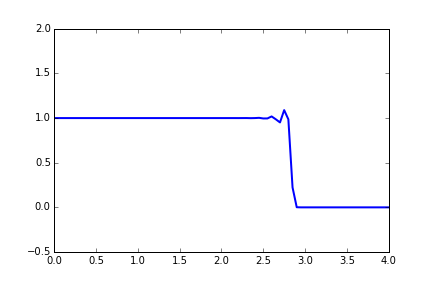

In [8]:
u = u_initial(nx)
sigma = 1
dt = sigma*dx

un = maccormack(u,nt,dt,dx)

fig = plt.figure();
ax = plt.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')


In [9]:
u

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

In [10]:
u[:-1]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [11]:
def maccormack_damping(u, nt, dt, dx,epsilon):
    un = numpy.zeros((nt,len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    
    for i in range(1,nt):
        F = computeF(u)
        
        ustar[1:-1] = u[1:-1]-dt/dx*(F[2:]-F[1:-1])+epsilon*(u[2:]-2*u[1:-1]+u[:-2])
       
        
        Fstar = computeF(ustar)
        
        un[i,1:] = 0.5*(u[1:]+ustar[1:]-dt/dx*(Fstar[1:]-Fstar[:-1])) 
        
        u = un[i].copy()
        
    return un


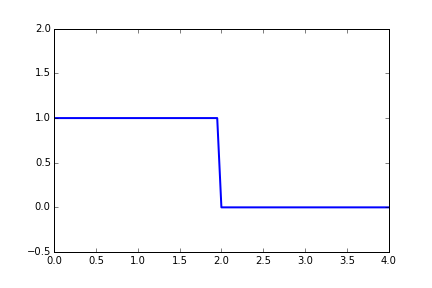
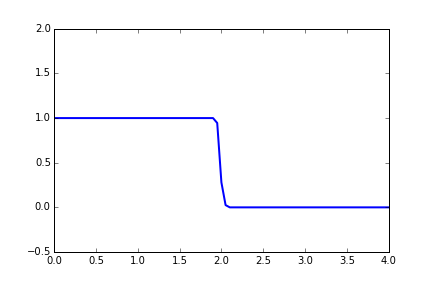
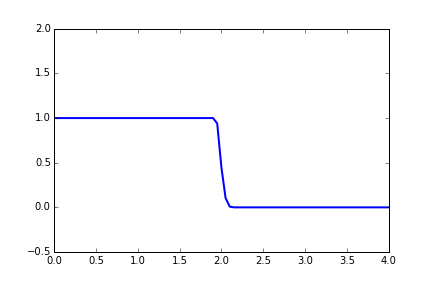
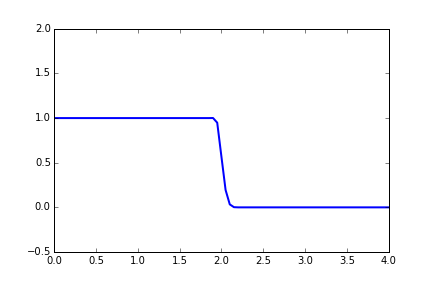
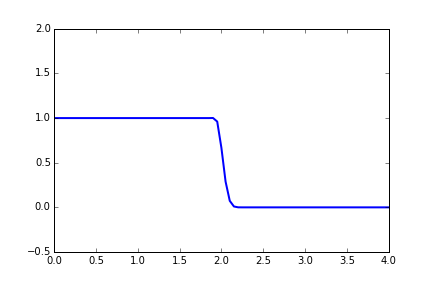
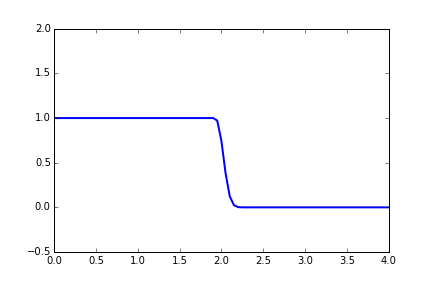
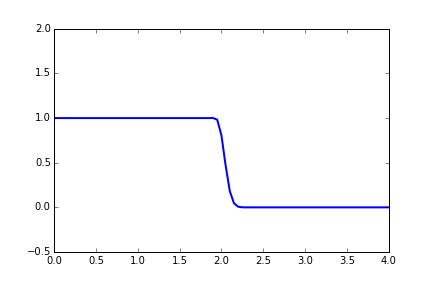
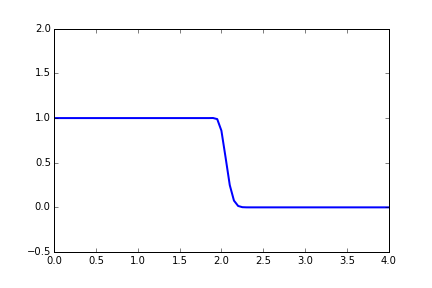
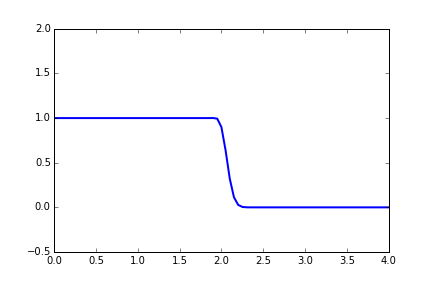
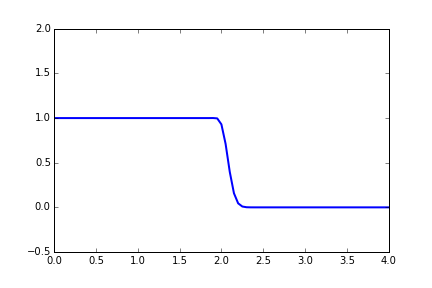
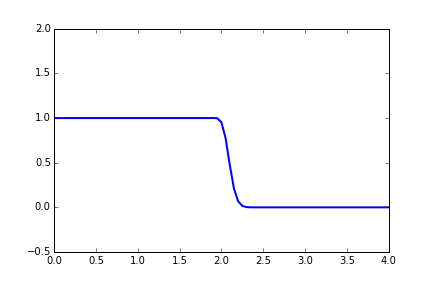
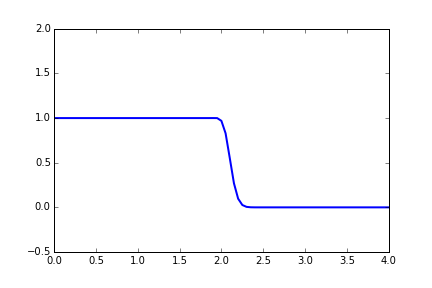
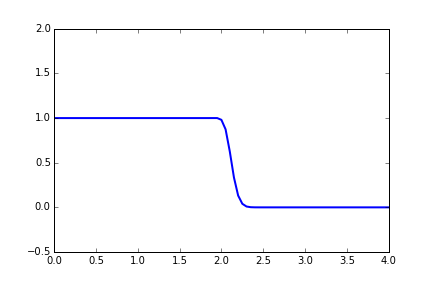
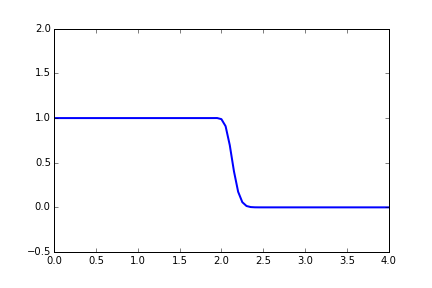
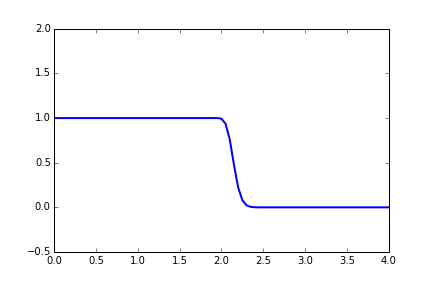
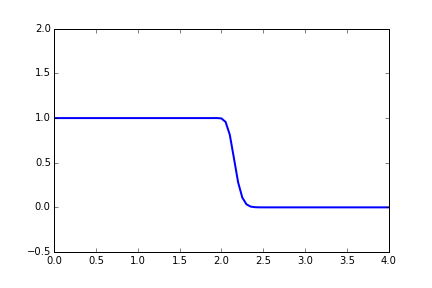
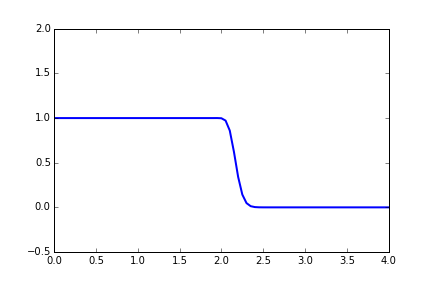
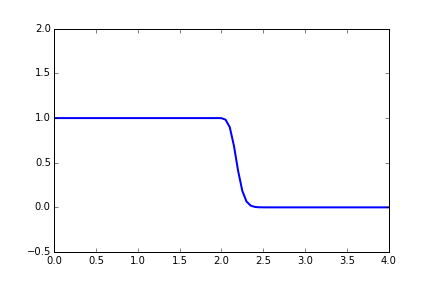
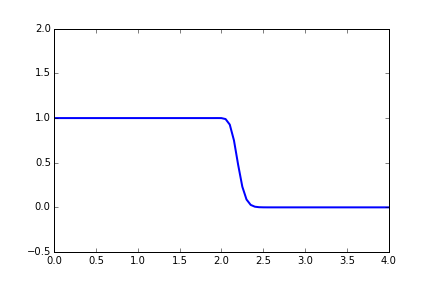
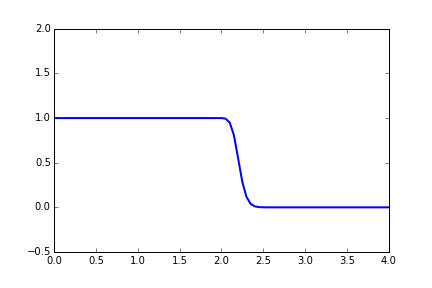
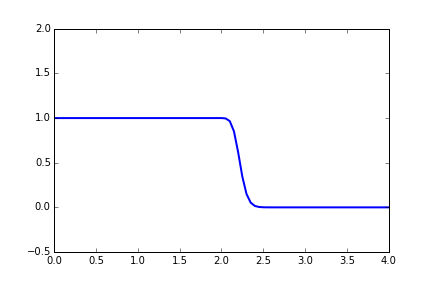
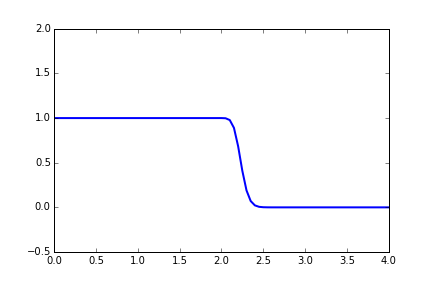
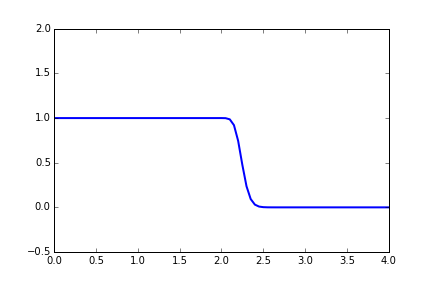
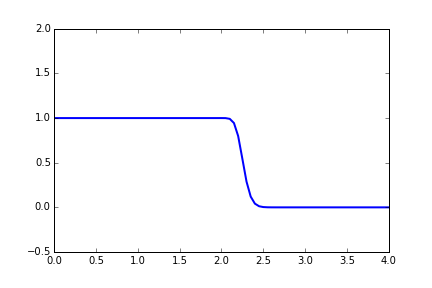
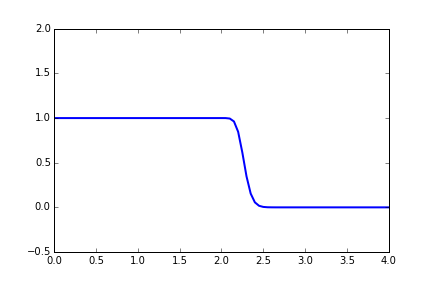
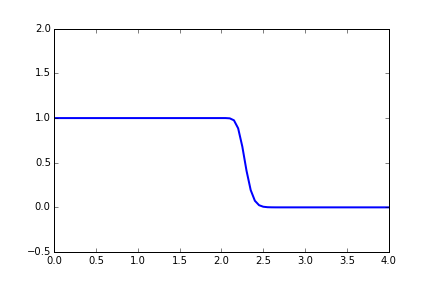
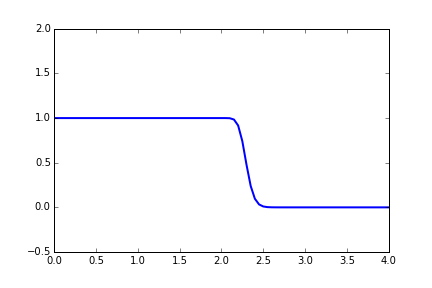
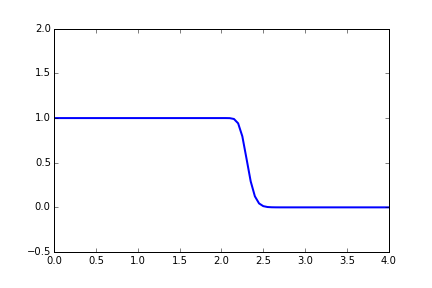
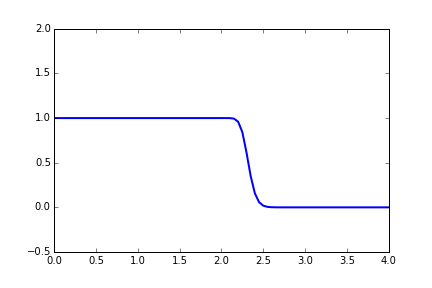
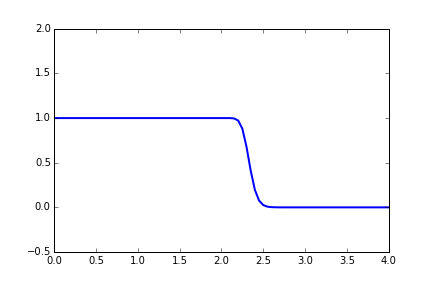
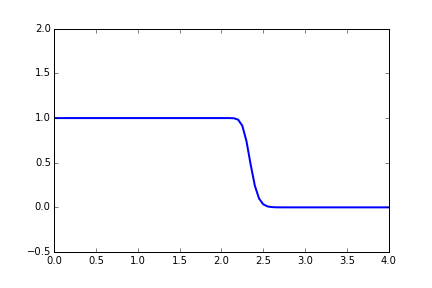
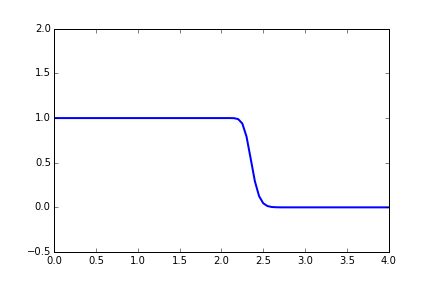
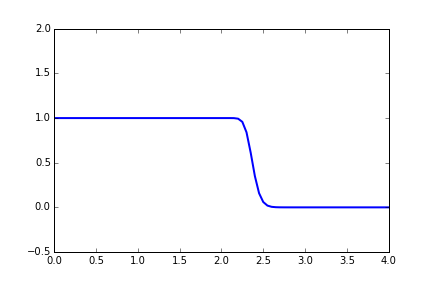
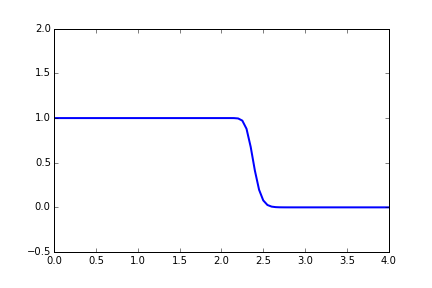
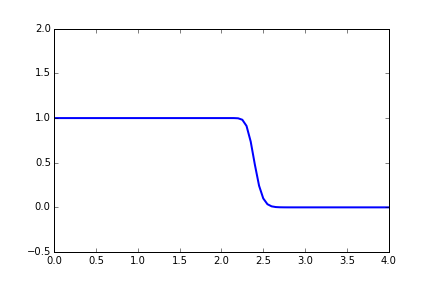
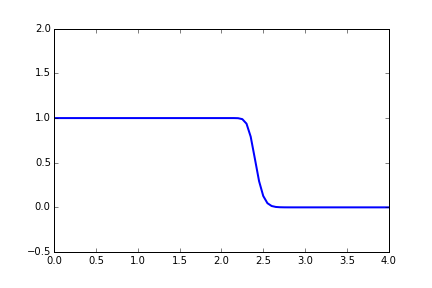
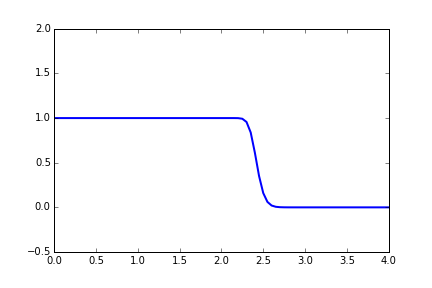
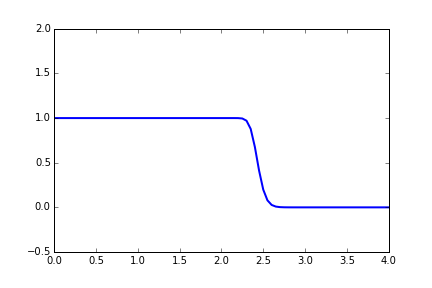
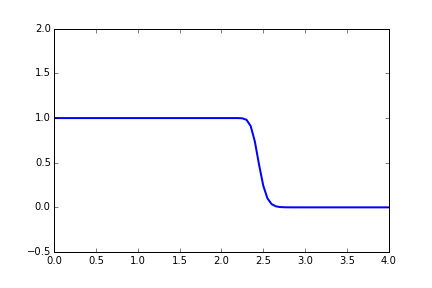
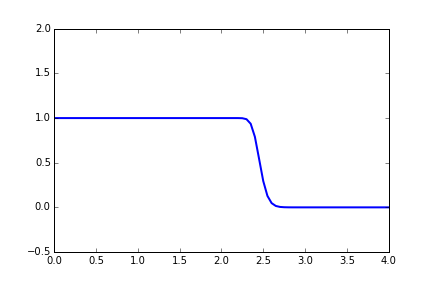
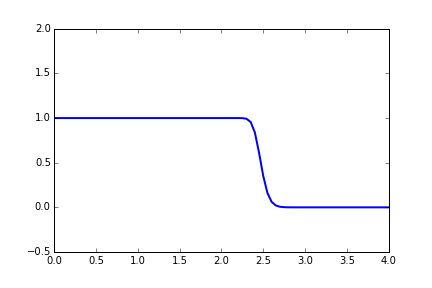
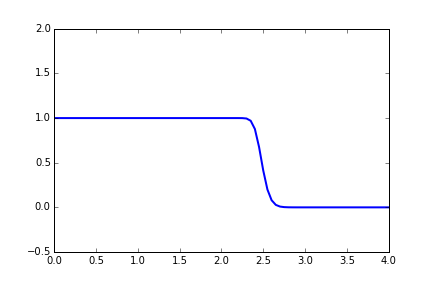
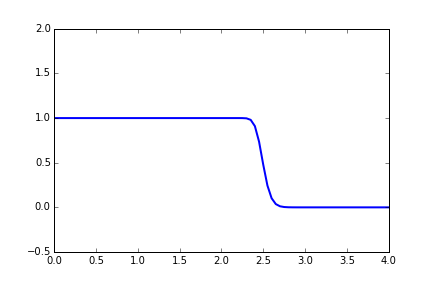
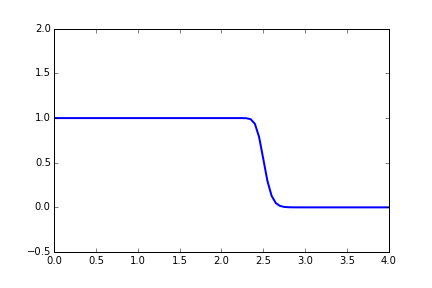
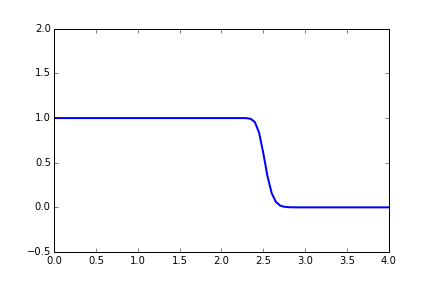
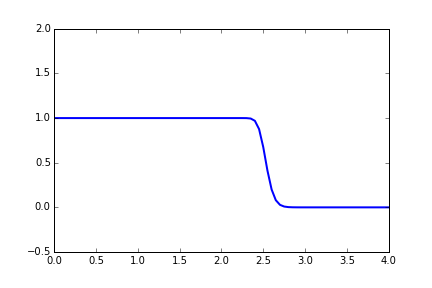
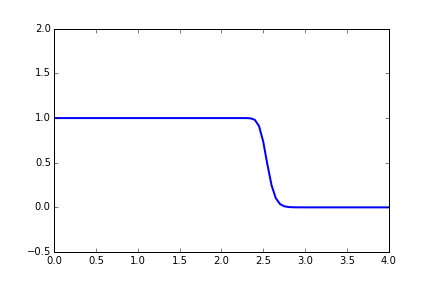
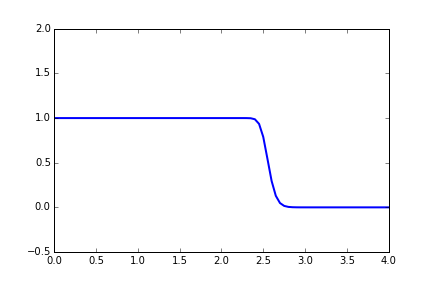
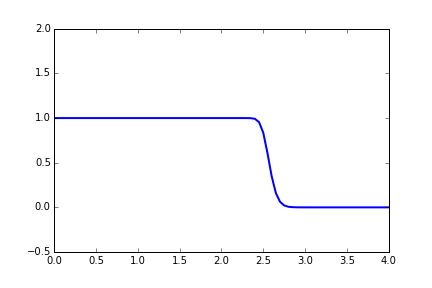
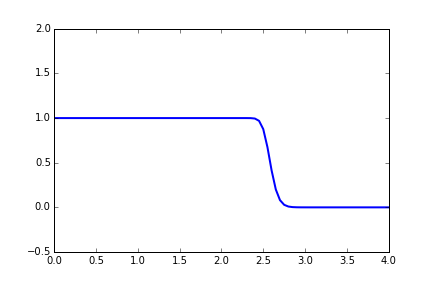
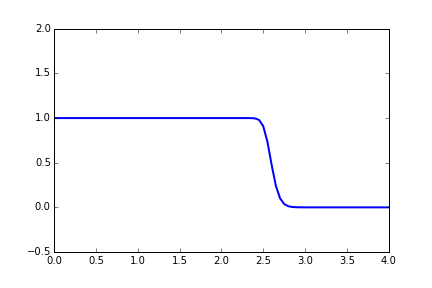
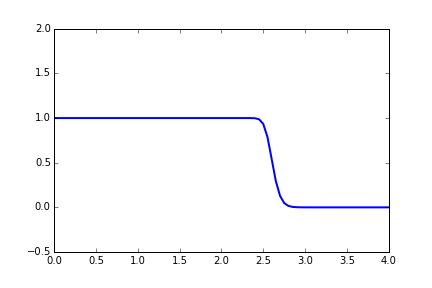
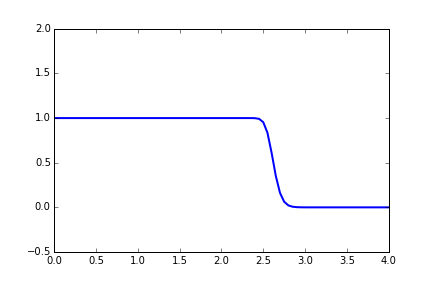
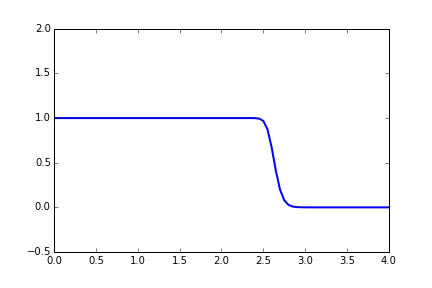
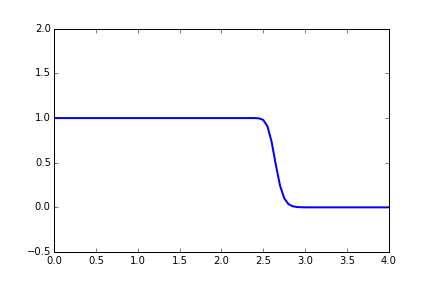
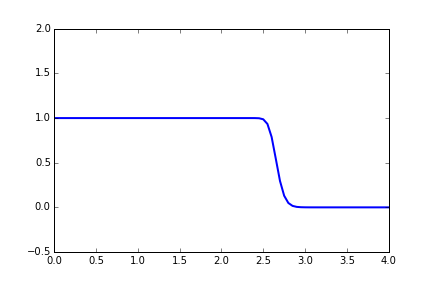
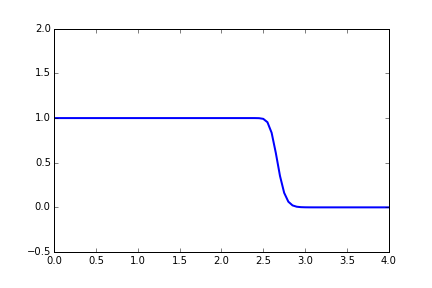
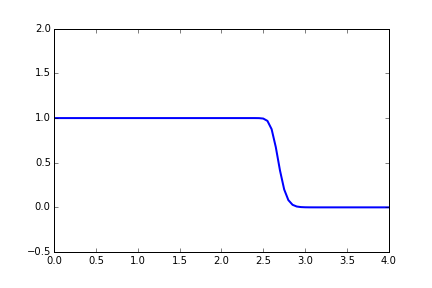
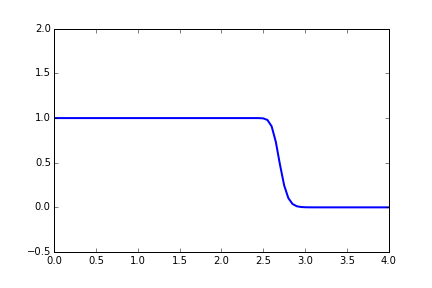
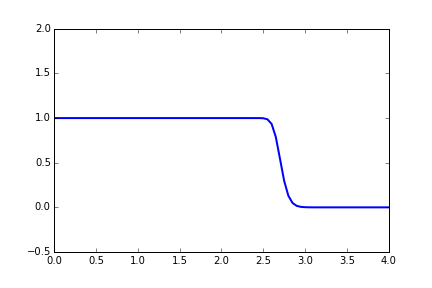
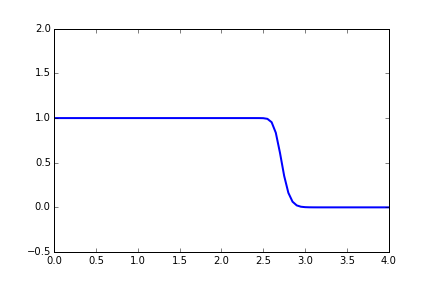
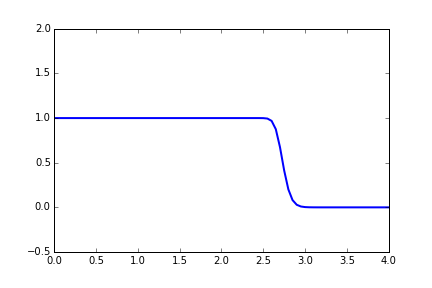
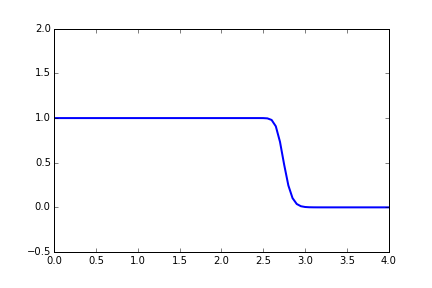
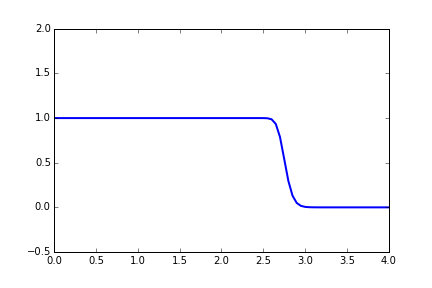
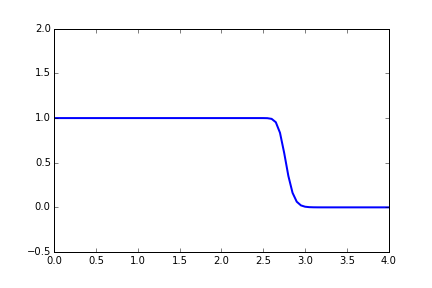
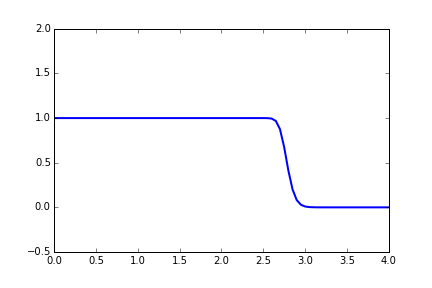
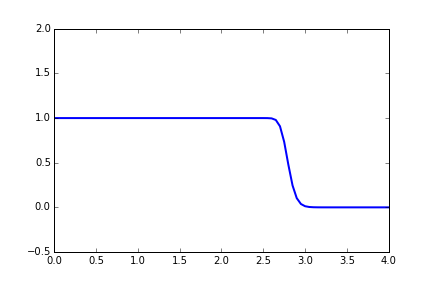
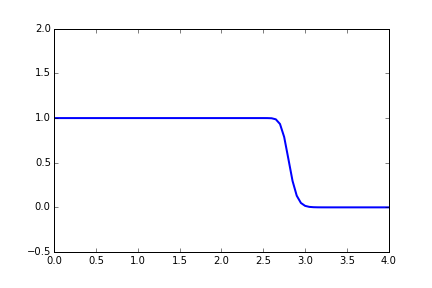
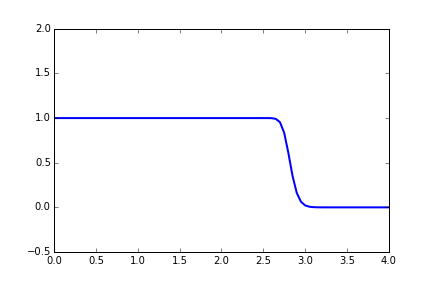
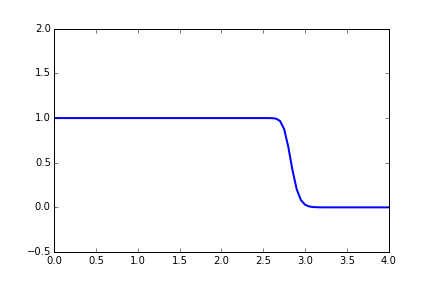

In [22]:
u = u_initial(nx).copy()
sigma = 1
dt = sigma*dx
epsilon = 0.45

un_d=maccormack_damping(u,nt,dt,dx,epsilon)

fig = plt.figure();
ax = plt.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un_d, interval=50)
display_animation(anim, default_mode='once')
